In [18]:
import scanpy as sc 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
import anndata as ad
import pandas as pd
from scipy import stats
os.system("clear")

###############
data_dir="/goofys/users/Aleksandra_S/benchmarking_datasets/"
###############

In [21]:
adata_s1 = ad.read_h5ad(f"{data_dir}E9.5_E2S1.MOSTA.h5ad")
adata_s2 = ad.read_h5ad(f"{data_dir}E9.5_E2S2.MOSTA.h5ad")
adata_s3 = ad.read_h5ad(f"{data_dir}E9.5_E2S3.MOSTA.h5ad")
adata_s4 = ad.read_h5ad(f"{data_dir}E9.5_E2S4.MOSTA.h5ad")

In [22]:
adatas = [adata_s1, adata_s2, adata_s3, adata_s4]

In [24]:
adata = ad.concat(adatas, label="batch")
# adata.obs_names_make_unique()
adata

/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/anndata/_core/merge.py:1033: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  concat_annot[label] = label_col
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 20504 × 21583
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'annotation', 'Regulon - Alx4', 'Regulon - Arx', 'Regulon - Atf1', 'Regulon - Bach1', 'Regulon - Barhl1', 'Regulon - Batf3', 'Regulon - Bcl3', 'Regulon - Bclaf1', 'Regulon - Bmyc', 'Regulon - Brf1', 'Regulon - Brf2', 'Regulon - Cdx1', 'Regulon - Cebpa', 'Regulon - Cebpb', 'Regulon - Creb1', 'Regulon - Creb3l1', 'Regulon - Crx', 'Regulon - Ctcf', 'Regulon - Cux1', 'Regulon - Dbx1', 'Regulon - E2f1', 'Regulon - E2f2', 'Regulon - E2f3', 'Regulon - E2f4', 'Regulon - E2f5', 'Regulon - E2f6', 'Regulon - Egr1', 'Regulon - Egr4', 'Regulon - Elf2', 'Regulon - Elk1', 'Regulon - Elk3', 'Regulon - En1', 'Regulon - Eomes', 'Regulon - Ep300', 'Regulon - Erg', 'Regulon - Esrra', 'Regulon - Esx1', 'Regulon - Ets2', 'Regulon - Etv2', 'Regulon - Etv4', 'Regulon - Etv5', 'Regulon - Evx1', 'Regulon - Ezh2', 'Regulon - Figla', 'Regulon - Fli1', 'Regulon - Fosl1',

In [27]:
adata.obs.annotation

cell_name
227_375    Cavity
227_376    Cavity
227_377    Cavity
227_378    Cavity
227_379    Cavity
            ...  
332_356    Cavity
332_357    Cavity
332_358    Cavity
332_359    Cavity
332_360    Cavity
Name: annotation, Length: 20504, dtype: category
Categories (16, object): ['AGM', 'Brain', 'Branchial arch', 'Cavity', ..., 'Primitive gut tube', 'Sclerotome', 'Spinal cord', 'Surface ectoderm']

In [28]:
adata.obs.batch

cell_name
227_375    0
227_376    0
227_377    0
227_378    0
227_379    0
          ..
332_356    3
332_357    3
332_358    3
332_359    3
332_360    3
Name: batch, Length: 20504, dtype: category
Categories (4, object): ['0', '1', '2', '3']

In [29]:
adata.write_h5ad("mouse_embryo_E9.5_S1-S4.h5ad")

In [30]:
adata1 = ad.read_h5ad("/goofys/users/Aleksandra_S/benchmarking_datasets/mouse_embryo_E9.5_S1-S4.h5ad")

/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [31]:
adata1

AnnData object with n_obs × n_vars = 20504 × 21583
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'annotation', 'Regulon - Alx4', 'Regulon - Arx', 'Regulon - Atf1', 'Regulon - Bach1', 'Regulon - Barhl1', 'Regulon - Batf3', 'Regulon - Bcl3', 'Regulon - Bclaf1', 'Regulon - Bmyc', 'Regulon - Brf1', 'Regulon - Brf2', 'Regulon - Cdx1', 'Regulon - Cebpa', 'Regulon - Cebpb', 'Regulon - Creb1', 'Regulon - Creb3l1', 'Regulon - Crx', 'Regulon - Ctcf', 'Regulon - Cux1', 'Regulon - Dbx1', 'Regulon - E2f1', 'Regulon - E2f2', 'Regulon - E2f3', 'Regulon - E2f4', 'Regulon - E2f5', 'Regulon - E2f6', 'Regulon - Egr1', 'Regulon - Egr4', 'Regulon - Elf2', 'Regulon - Elk1', 'Regulon - Elk3', 'Regulon - En1', 'Regulon - Eomes', 'Regulon - Ep300', 'Regulon - Erg', 'Regulon - Esrra', 'Regulon - Esx1', 'Regulon - Ets2', 'Regulon - Etv2', 'Regulon - Etv4', 'Regulon - Etv5', 'Regulon - Evx1', 'Regulon - Ezh2', 'Regulon - Figla', 'Regulon - Fli1', 'Regulon - Fosl1',

In [3]:
adata_s1.X.data

array([2.866716 , 2.866716 , 2.866716 , ..., 4.209409 , 7.6668773,
       9.05282  ], dtype=float32)

komentar: kao da su logaritmovani

In [5]:
adata_s1.X.sum(axis=1)

matrix([[1199.7817  ],
        [3319.4658  ],
        [3665.1257  ],
        ...,
        [1315.3643  ],
        [ 505.96512 ],
        [  16.719698]], dtype=float32)

In [6]:
adata_s1.X.sum(axis=1).min()

16.719698

In [7]:
adata_s1.X.sum(axis=1).max()

4542.209

/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


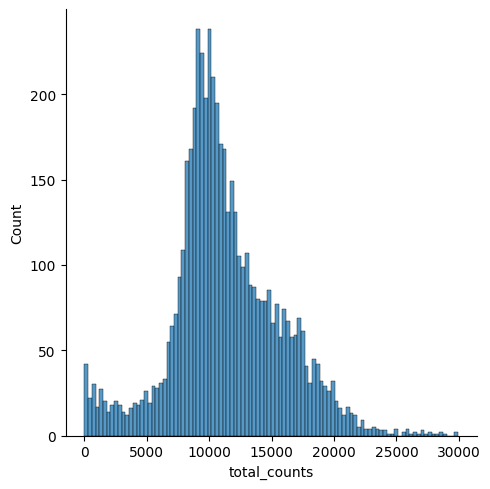

In [9]:
p1 = sns.displot(adata_s1.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata_s1, 'total_counts')
# p2 = sc.pl.violin(adata, "pct_counts_mt")

In [10]:
adata_copy = adata_s1.copy()

Number of cells that contain each gene

In [15]:
pd.Series(adata_s1.var.n_cells).describe().round()

count    23756.0
mean       760.0
std       1133.0
min          1.0
25%         14.0
50%        203.0
75%       1074.0
max       5271.0
Name: n_cells, dtype: float64

/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


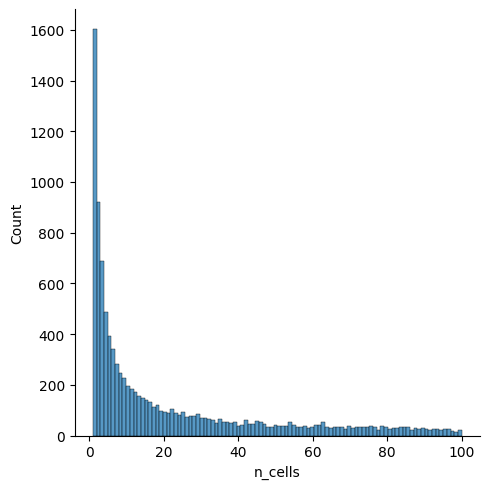

In [16]:
p1 = sns.displot(adata_s1[:,adata_s1.var["n_cells"]<=100].var["n_cells"], bins=100, kde=False)

In [16]:
print(f"Total number of genes: {adata_s1.n_vars}")

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata_s1, min_cells=20)
print(f"Number of genes after cell filter: {adata_s1.n_vars}")

Total number of genes: 28798
Number of genes after cell filter: 16342


In [17]:
# Preliminary clustering for differentiated normalisation
adata_pp = adata_s1.copy()
sc.pp.normalize_total(adata_pp, target_sum=1e6)
sc.pp.log1p(adata_pp)
sc.pp.pca(adata_pp, n_comps=15)
sc.pp.neighbors(adata_pp)
sc.tl.leiden(adata_pp, key_added="groups")

/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/umap/distances.py:

In [18]:
adata_pp.X.max()

12.546049

/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


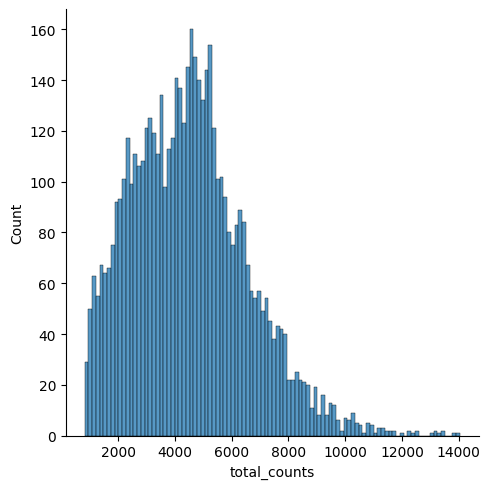

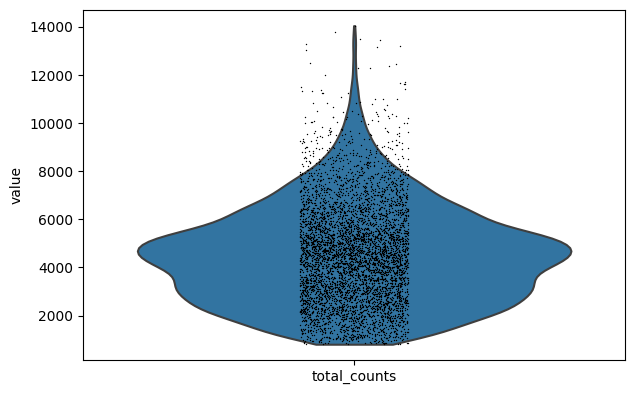

In [19]:
p1 = sns.displot(adata_pp.obs["total_counts"], bins=100, kde=False)
sc.pl.violin(adata_pp, 'total_counts')
# p2 = sc.pl.violin(adata, "pct_counts_mt")
# p3 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [21]:
adata_pp.obs.groups

cell_name
227_207     2
341_183     4
164_71      8
435_106     5
316_201     7
           ..
405_277    21
403_26      4
191_188     2
222_66     16
240_49      8
Name: groups, Length: 5329, dtype: category
Categories (24, object): ['0', '1', '2', '3', ..., '20', '21', '22', '23']